### Bijay Khanal ML Assignment

In [ ]:
1.	Import the provided “framingham.csv” file to your environment as a DataFrame.

2.	Check to see the number of null values in each column.

3.	Print a summary statistic of the data by ignoring the null values.

4.	Impute the null values with an appropriate scheme.

5.	Divide the data into features matrix and target array. The ‘TenYearCHD’ is the target column.

6.	Perform feature engineering by visualizing a pair plot of the features. You can discard features
    based on how they are correlated with other features.   

7.	Create a baseline ML model by using Naive Bayes algorithm to predict ‘TenYearCHD’. Calculate and show the accuracy score
of the baseline model.

8.	Improve on your baseline model by using each of the more complex models listed below. 

1.	Linear Regression
2.	Support Vector Machine
3.	Random Forest

	Perform hyper-parameters tuning using appropriate techniques (e.g.GridSearchCV or 	RandomizedSearchCV) in each of the
    models. 

	Report the accuracy score of each of the above models given by the best model returned by 	the CV (Cross Validation)
    search.

	Which model produced the best accuracy score?


In [48]:
import pandas as pd

In [49]:
data = pd.read_csv("framingham.csv")

In [50]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [51]:
data.columns.size

16

In [52]:
data.isna()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4234,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4235,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [54]:
data.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [55]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'mean')
data_imputed = imp.fit_transform(data)
data_imputed

array([[  1.        ,  39.        ,   4.        , ...,  80.        ,
         77.        ,   0.        ],
       [  0.        ,  46.        ,   2.        , ...,  95.        ,
         76.        ,   0.        ],
       [  1.        ,  48.        ,   1.        , ...,  75.        ,
         70.        ,   0.        ],
       ...,
       [  0.        ,  48.        ,   2.        , ...,  84.        ,
         86.        ,   0.        ],
       [  0.        ,  44.        ,   1.        , ...,  86.        ,
         81.96675325,   0.        ],
       [  0.        ,  52.        ,   2.        , ...,  80.        ,
        107.        ,   0.        ]])

In [56]:
type(data_imputed)

numpy.ndarray

In [57]:
X = data_imputed[:, :-1]
y= data_imputed[:, -1]

In [60]:
type(X)

numpy.ndarray

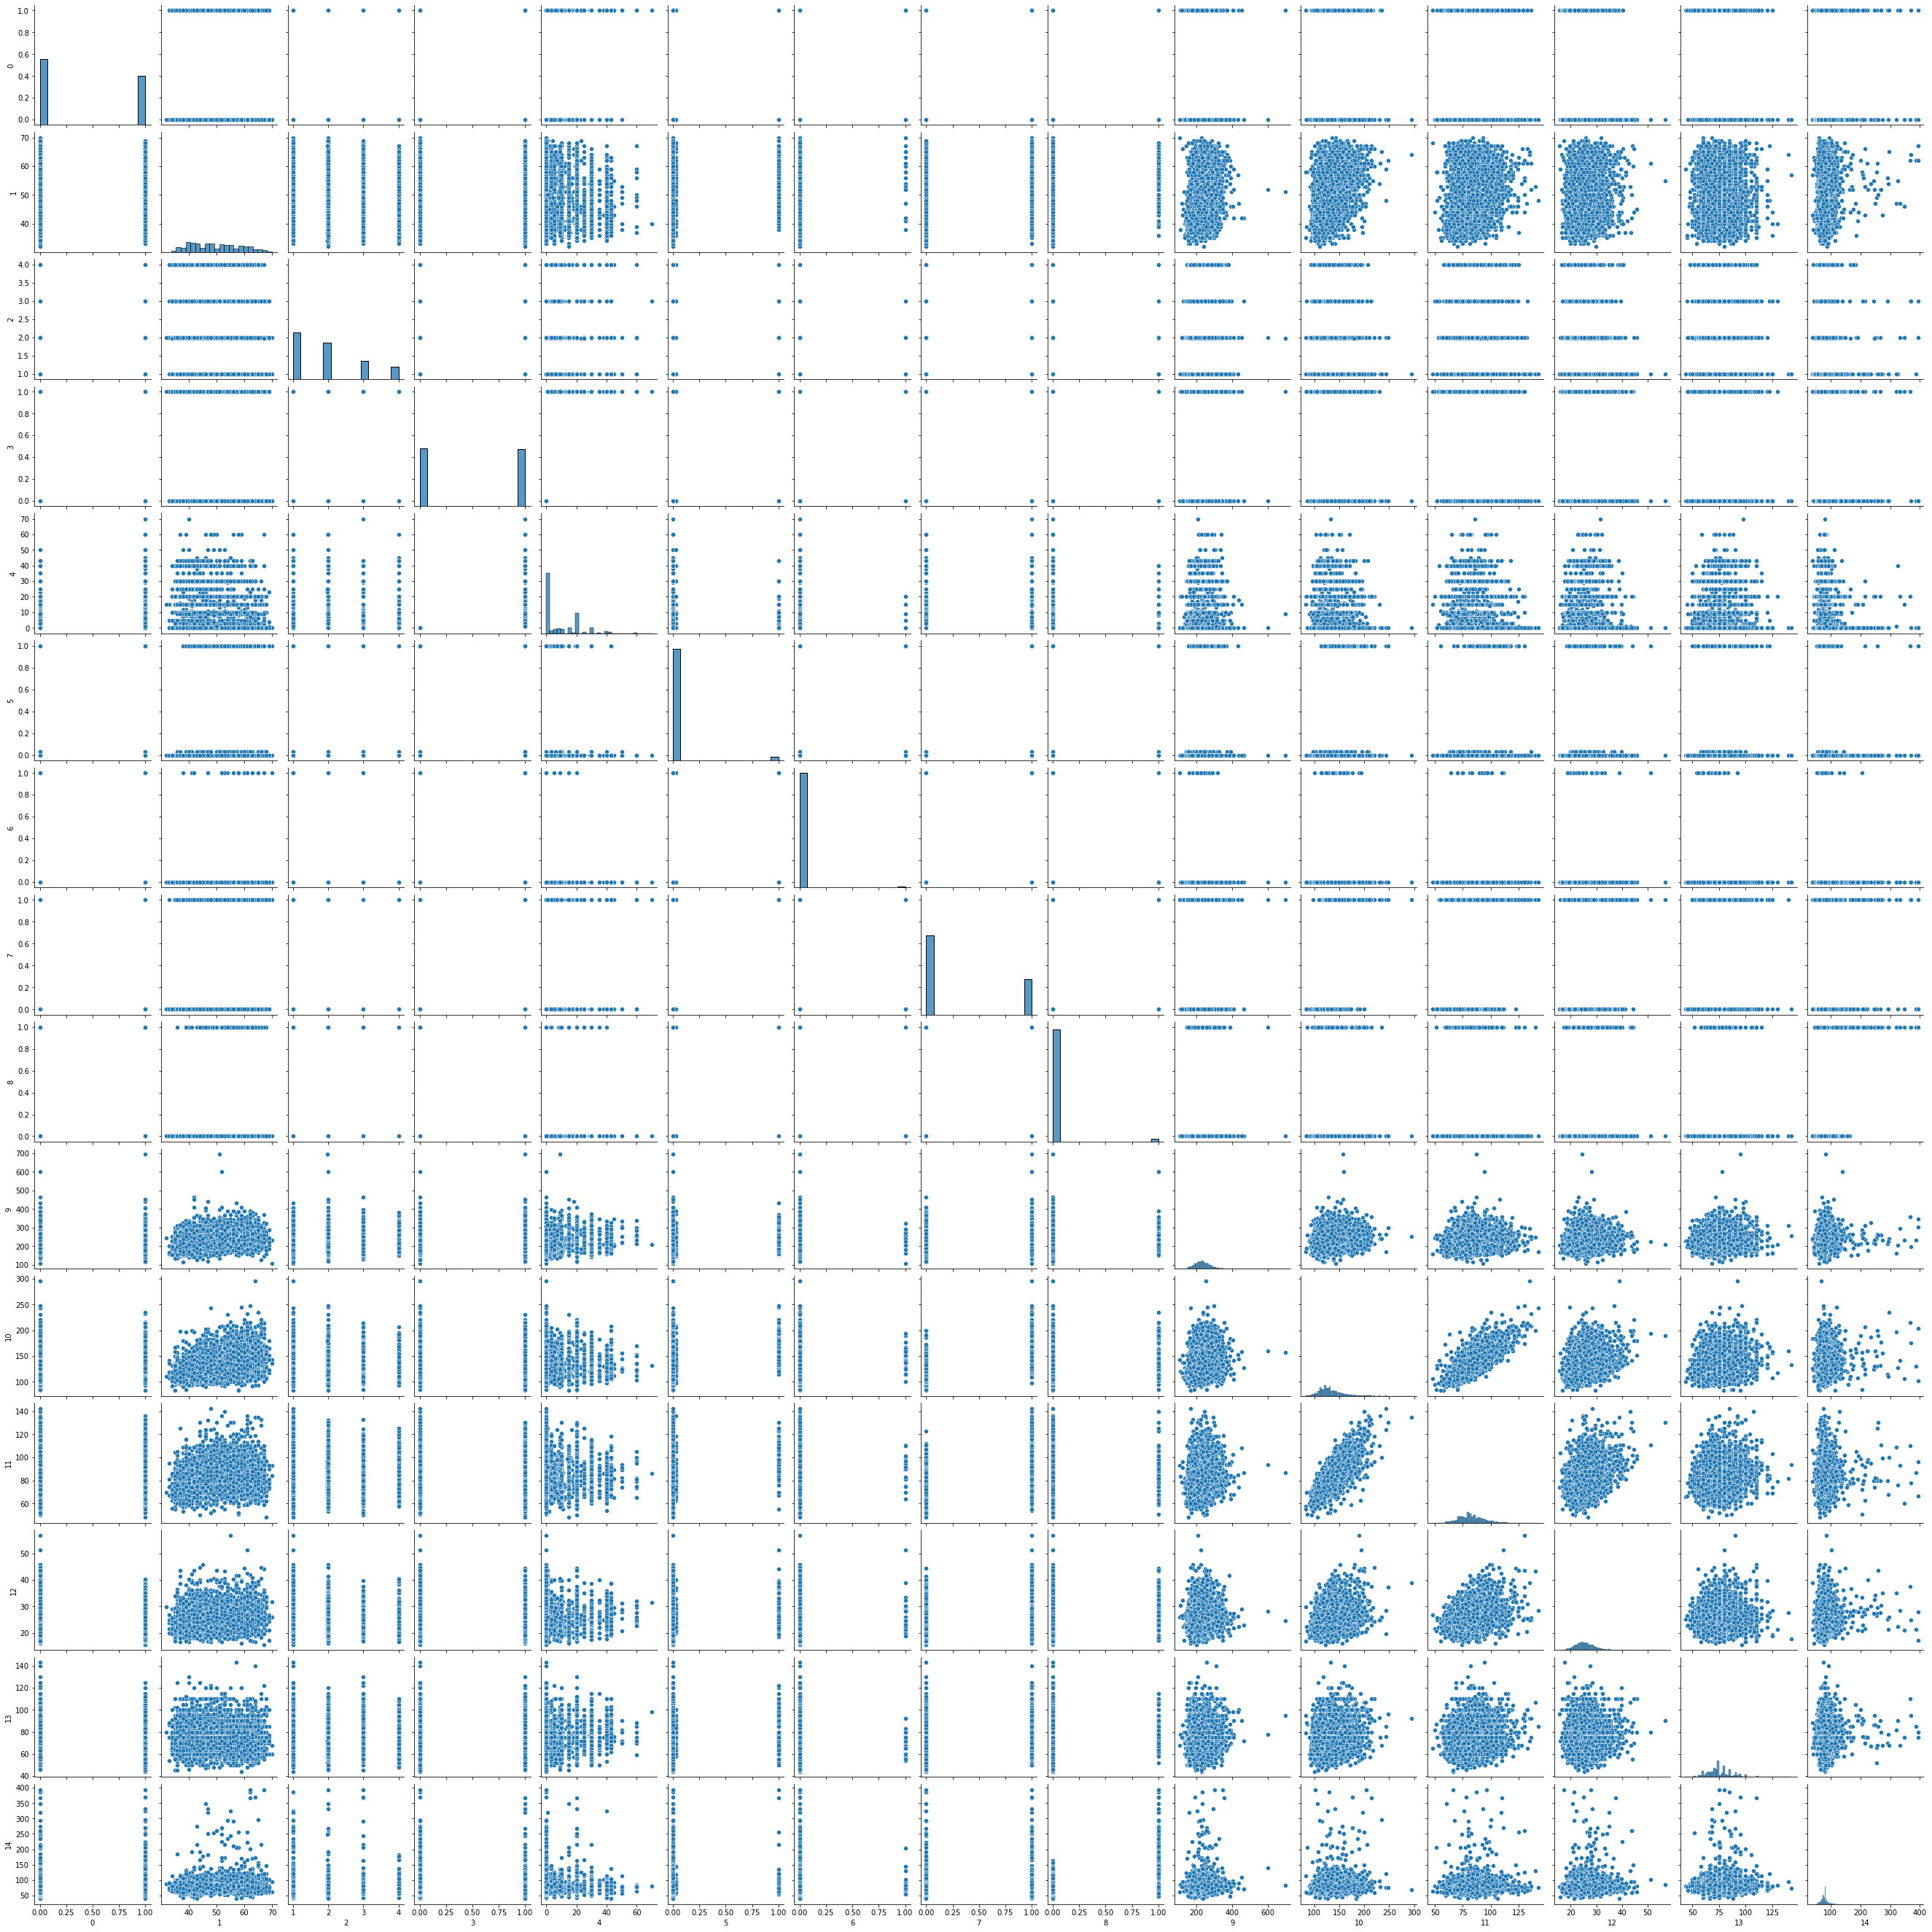

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

X_df = pd.DataFrame(X)

sns.pairplot(X_df)
plt.show()
